## Gathering Data

In [1]:
import pandas as pd
import numpy as np

### 1. First source: WeRateDogs Twitter archive

The file name is 'twitter_archive_enhanced.csv'.

In [2]:
df= pd.read_csv('twitter_archive_enhanced.csv')
df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### 2. Second source: The tweet image predictions

The tweet image predictions give informations on what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [3]:
import requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url, allow_redirects=True)
with open('image-predictions.tsv', mode='wb')as file:
    file.write(response.content)

In [4]:
df_image=pd.read_csv('image-predictions.tsv','\t')
df_image.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


### 3. Third source: Using Twitter's API, Tweepy

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'hidden'
consumer_secret = 'hidden'
access_token = 'hidden'
access_secret = 'hidden'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            #errors are copied to fails_dict
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


This tweet_json.txt file is read line by line to extract the informations about the tweet ID, retweet count, and favorite count. This three new value will be added to the DataFrame later.

In [5]:
import json

df_list=[]
file ='tweet_json.txt'
with open(file,'r+') as f:
    #reading the file line by line
    for line in f:
        #deserialize json document to python object
        line=json.loads(line)
        tweet_id= line['id']
        retweet_count= line['retweet_count']
        favorite_count= line['favorite_count']
        df_list.append({'tweet_id': int(tweet_id),
                        'retweet_count': int(retweet_count),
                        'favorite_count': int(favorite_count)})
    
df_count= pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
df_count.head(3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8370,38207
1,892177421306343426,6179,32761
2,891815181378084864,4089,24669


## Accessing Data

In [6]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [8]:
df_count

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8370,38207
1,892177421306343426,6179,32761
2,891815181378084864,4089,24669
3,891689557279858688,8502,41532
4,891327558926688256,9213,39724
5,891087950875897856,3065,19936
6,890971913173991426,2032,11667
7,890729181411237888,18572,64475
8,890609185150312448,4205,27399
9,890240255349198849,7271,31450


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
df[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [11]:
df.rating_numerator.unique()


array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [12]:
len(df[df.rating_numerator > 17])

25

In [13]:
df[df.rating_denominator!=10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [14]:
df[df.duplicated('expanded_urls', False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [15]:
df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [16]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
df_image.img_num.value_counts() #image number cannot be more than 4

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [18]:
df_image.shape

(2075, 12)

In [19]:
df_image.tweet_id.duplicated().any()

False

In [20]:
df_count.sample(10)

,tweet_id,retweet_count,favorite_count
486,813157409116065792,2444,8320
181,856282028240666624,6533,28230
871,760190180481531904,1968,6068
683,786729988674449408,2663,0
2248,667546741521195010,127,338
116,869702957897576449,6364,28129
1992,672267570918129665,634,1534
1098,733460102733135873,1367,4427
890,758405701903519748,2093,5532
1104,732005617171337216,5843,15702


In [21]:
df_count.shape

(2342, 3)

In [22]:
df_count.describe()

,tweet_id,retweet_count,favorite_count
count,2.342000e+03,2342.000000,2342.000000
mean,7.422212e+17,2950.541418,8000.258326
std,6.832408e+16,4962.255828,12382.164463
min,6.660209e+17,0.000000,0.000000
25%,6.783509e+17,592.500000,1382.750000
50%,7.186224e+17,1377.000000,3483.000000
75%,7.986971e+17,3442.250000,9801.500000
max,8.924206e+17,84083.000000,164943.000000


### Quality Issues

##### `df` table

1. Some are retweets
2. Timestamp's datatype is object not a datetime
3. Dogs name None,a,the,an,such,not
4. Error rating_denominator: denominator is not 10
5. Numerator too high
6. Unnecessary columns for analysis : in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp 
7. tweets with timestamp after 1st of August 2017
8. Some columns not necessary for this analysis

##### `df_image` table

1. Some data do not represent dogs.(all three False predictions) eg Index : 6 is turtle;2052 is car
2. Missing rows

##### `df__count` table

1. missing rows


### Tidiness Issues

1. 1 variable in 4 columns (dog stage) in `df` table.
2. retweet_counts and favorite_counts in `df_counts` should be in `df` table.

## Clean

In [23]:
df_clean = df.copy()
df_image_clean = df_image.copy()
df_count_clean = df_count.copy()

### Missing Data

#### a. Missing Values for analysis : in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

#### b. Some columns not necessary for this analysis

##### Define
These columns below contains mostly missing data. However they are not relevant to this analysis. So those columns are dropped from the dataframe:

- in_reply_to_status_id
- in_reply_to_user_id
- retweeted_status_id
- retweeted_status_user_id
- retweeted_status_timestamp
- source

##### Code

In [24]:
df_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [25]:
columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 
           'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'source']
df_clean.drop(columns,axis=1,inplace=True)

##### Test

In [26]:
df_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Tidiness Issues

#### variable in 4 columns (dog stage) in `df` table

##### Define
Using mask to take those data with dog stages only. Then melt the columns to a new single variable which is 'dog_stage' and merge it back to the `df_clean` on 'tweet_id'. Drop the 'doggo','floofer','pupper' and 'puppo' columns.

##### Code

In [27]:
#make a copy of the df_clean
df_stages = df_clean.copy()

#melt the new df with the column for value name as 'dog_stage'
df_stages=pd.melt(df_stages,id_vars= 'tweet_id',value_vars=['doggo','floofer','pupper','puppo'],value_name='dog_stage')

#selecting rows that contains information of the dog_stage only
df_stages= df_stages[df_stages['dog_stage'] != 'None']

#drop the variable column 
df_stages.drop('variable',axis=1,inplace=True)

#merge the df_clean with the df_stages
df_clean= pd.merge(df_clean,df_stages,how='left',on='tweet_id')

#drop columns doggo,floofer,pupper,puppo
df_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)
df_clean.reindex()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN
6,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
7,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN
8,890609185150312448,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


##### Test

In [28]:
df_clean.tail(5)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
2365,666049248165822465,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,NaN
2366,666044226329800704,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN
2367,666033412701032449,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN
2368,666029285002620928,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN
2369,666020888022790149,2015-11-15 22:32:08 +0000,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,NaN


However after the merge the total rows are now 2370 instead of 2356. Check for duplicates, if exist drop them.

In [29]:
df_clean.tweet_id.duplicated().sum()

14

In [30]:
df_clean=df_clean.drop_duplicates(subset= 'tweet_id')
df_clean.shape

(2356, 8)

#### retweet_counts and favorite_counts in `df_counts` should be in `df` table.

##### Define 
Merge `df_count_clean` with `df_clean` table on their 'tweet_id'.

##### Code

In [31]:
df_clean= pd.merge(df_count_clean,df_clean, how='left' , on='tweet_id')

##### Test

In [32]:
df_clean.head()

,tweet_id,retweet_count,favorite_count,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,8370,38207,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,6179,32761,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,4089,24669,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,8502,41532,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,9213,39724,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


In [33]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 0 to 2341
Data columns (total 10 columns):
tweet_id              2342 non-null int64
retweet_count         2342 non-null int64
favorite_count        2342 non-null int64
timestamp             2342 non-null object
text                  2342 non-null object
expanded_urls         2283 non-null object
rating_numerator      2342 non-null int64
rating_denominator    2342 non-null int64
name                  2342 non-null object
dog_stage             378 non-null object
dtypes: int64(5), object(5)
memory usage: 201.3+ KB


### Quality Issues

`df_image_clean` table:

#### Some data do not represent dogs.(all three False predictions) eg Index : 6 is turtle;2052 is car


##### Define
df_clean data should be about dogs only. If the tweet_id of the non dog from the df_image_clean exist in df_clean, they are to be removed.
Next,mask the df_image_clean table with having at least one True prediction. 

##### Code

In [34]:
#list of tweet_id of the all False predictions
not_dog= list(df_image_clean.query('p1_dog== False & p2_dog == False & p3_dog == False').tweet_id)

#create new column in df_clean that is True if it is a dog and False otherwise.This column is to 
#be use as mask in the next step
df_clean['dog']= df_clean.tweet_id.apply(lambda x: False if x in not_dog else True)

#Filtering data that is True for dog only for `df_clean` table
df_clean= df_clean[df_clean.dog]

#drop the dog column
df_clean= df_clean.drop('dog',axis=1)

#df_image_clean should have at least one True for dog prediction
df_image_clean= df_image_clean.query('p1_dog!= False | p2_dog != False | p3_dog != False')



##### Test

In [35]:
df_image_clean.query('p1_dog== False & p2_dog == False & p3_dog == False').any() #output should be False

tweet_id    False
jpg_url     False
img_num     False
p1          False
p1_conf     False
p1_dog      False
p2          False
p2_conf     False
p2_dog      False
p3          False
p3_conf     False
p3_dog      False
dtype: bool

#### Missing rows

##### Define
This is not an issue anymore since the non dogs tweet are dropped from all tables.

`df_clean` table:

#### Some are retweets

##### Define
For retweets the test starts with 'RT'. To remove all retweets, masking is used by setting all the text that start with 'RT' as False.

##### Code

In [36]:
df_clean=df_clean[df_clean.text.str.startswith('RT')== False]

##### Test

In [37]:
df_clean[df_clean.text.str.startswith('RT')]

,tweet_id,retweet_count,favorite_count,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


#### Timestamp's datatype is object not a datetime

##### Define 
change timestamp to datetime datatype.

##### Code

In [38]:
df_clean.timestamp= pd.to_datetime(df_clean['timestamp'])

##### Test

In [39]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1864 entries, 1 to 2341
Data columns (total 10 columns):
tweet_id              1864 non-null int64
retweet_count         1864 non-null int64
favorite_count        1864 non-null int64
timestamp             1864 non-null datetime64[ns]
text                  1864 non-null object
expanded_urls         1806 non-null object
rating_numerator      1864 non-null int64
rating_denominator    1864 non-null int64
name                  1864 non-null object
dog_stage             298 non-null object
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 160.2+ KB


In [40]:
df_clean.timestamp.head()

1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
5   2017-07-29 00:08:17
Name: timestamp, dtype: datetime64[ns]

#### Dogs name None,a,the,an,such and not

##### Define
Apply a function that converts dog's name to Unknown for None,a,the,an,such and not.

##### Code

In [41]:
#list the name to change
notname= ['None','a','the','an','such','not']

#function to apply
def change_name(row):
    if row['name'] in notname:
        return 'Unknown'
    else:
        return row['name']

df_clean['name']= df_clean.apply(change_name, axis=1)

##### Test

In [42]:
df_clean[df_clean.name=='Unknown'].shape

(611, 10)

In [43]:
df_clean.name[df_clean['name'] =='None'].any()

False

#### Error rating with denominator is not 10 

##### Define
- Some of the tweets has unacceptable rating and has also no url to track if the tweets are legit or not. So, for this case, the are remove from the table. tweet_id: [810984652412424192]
- The multiple 10 in the denominator represent more than one dog, so the rating for each dog should be divided for each dog. tweet_id: [820690176645140481, 758467244762497024, 713900603437621249, 710658690886586372, 709198395643068416, 704054845121142784, 697463031882764288, 684225744407494656, 684222868335505415, 677716515794329600, 675853064436391936]
- some rating are wrong bacause there are two '/' in the text. the second '/' is actually represent the rating. The wrong rating value are replace with the correct one. tweet_id: [740373189193256964, 722974582966214656, 716439118184652801, 682962037429899265, 666287406224695296]



In [44]:
#to view truncated text in text column
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)

#view all the rating with denominator not 10
df_clean[['tweet_id','text','rating_numerator','rating_denominator']][df_clean.rating_denominator!=10]

,tweet_id,text,rating_numerator,rating_denominator
304,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
333,832088576586297345,@docmisterio account started on 11/15/15,11,15
423,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
506,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
889,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1054,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1151,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1188,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1214,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1240,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80


In [45]:
len(df_clean[['text','rating_numerator','rating_denominator']][df_clean.rating_denominator!=10])

21

##### Code

In [46]:
#remove the tweet that are not valid for the rating system and that are untraceable
id_remove=[810984652412424192,832088576586297345,686035780142297088,682808988178739200]
df_clean= df_clean[~df_clean['tweet_id'].isin(id_remove)]


In [47]:
#list of tweet_ids that have single rating value for more than one dog
id_dogs=[820690176645140481, 758467244762497024, 713900603437621249, 710658690886586372, 
         709198395643068416, 704054845121142784, 697463031882764288, 684225744407494656, 
         684222868335505415, 677716515794329600, 675853064436391936]

#create a mask for rows having same tweet_id in the list
mask1=df_clean['tweet_id'].isin(id_dogs)

#find how many dogs the rating represent n store them in a variable name 'factor'
factor= (df_clean.loc[mask1,'rating_denominator'])/10

#change their denominator to 10
df_clean.loc[mask1,'rating_denominator'] = 10

#recalculate their numerator by diving with the factor
df_clean.loc[mask1,'rating_numerator']= ((df_clean.loc[mask1,'rating_numerator'])/factor).astype(int)

In [48]:
#replacing the wrong rating_numerator and rating_denominator cause by the double '/' in text
id_rerate= [740373189193256964, 722974582966214656, 716439118184652801, 682962037429899265,
            666287406224695296,835246439529840640]

mask2=df_clean['tweet_id'].isin(id_rerate)
df_clean.loc[mask2,'rating_numerator']=df_clean[mask2].text.apply(lambda x: x.split('/')[1][-2:]).astype(int)
df_clean.loc[mask2,'rating_denominator']=df_clean[mask2].text.apply(lambda x: x.split('/')[2][:2]).astype(int)



##### Test

In [49]:
df_clean[mask1][['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
423,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,12,10
889,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,11,10
1214,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,11,10
1240,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,10,10
1260,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",9,10
1337,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,12,10
1419,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,11,10
1620,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",11,10
1621,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,11,10
1765,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,12,10


In [50]:
df_clean[mask2][['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
304,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",13,10
1054,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14,10
1151,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,13,10
1188,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11,10
1648,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,10,10
2321,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,9,10


In [51]:
df_clean[['tweet_id','text','rating_numerator','rating_denominator']][df_clean.rating_denominator!=10] 
#should return be empty list

,tweet_id,text,rating_numerator,rating_denominator


##### rating_numerator too high

##### Define
Replace the rating_numerator with the correct value. (e.g: 9.75 instead of 75). The value is the rounded up and changed to integer.

The remaining five tweets with rating_numerator as15 or more are untraceable of their sources. These might give false information later if included in our analysis. So they are removed from the dataframe.

Value of 15 is taken as baseline value because this tweet is not a rating for a dog(there is no tweet's url and has text as '@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10'), so anything higher than this value is questionable.

##### Code

In [52]:
#df_clean.rating_numerator.unique()
#high_rating= [ 420, 666, 182, 75]
df_clean[['tweet_id','text','rating_numerator']][df_clean.rating_numerator >= 15]

,tweet_id,text,rating_numerator
54,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17
182,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420
183,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666
282,838150277551247360,@markhoppus 182/10,182
283,838085839343206401,@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10,15
684,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
752,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
1698,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26


In [53]:
df_clean.rating_numerator = df_clean.rating_numerator.replace(75, 9.75).round().astype(int)
df_clean.rating_numerator = df_clean.rating_numerator.replace(27, 11.27).round().astype(int)
df_clean.rating_numerator = df_clean.rating_numerator.replace(26, 11.26).round().astype(int)


In [54]:
df_clean= df_clean[df_clean.rating_numerator < 15]

##### Test

In [55]:
df_clean[df_clean.rating_numerator >= 15]
#output should be empty

,tweet_id,retweet_count,favorite_count,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


#### Tweets with timestamp after 1st of August 2017

##### Define
The tweets should before 1st of August 2017 only. However the table df_clean are sorted with the latest timestamp and the latest is 2017-08-01. So this sorted out.

##### Test

In [56]:
df_clean.head()

,tweet_id,retweet_count,favorite_count,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1,892177421306343426,6179,32761,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN
2,891815181378084864,4089,24669,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN
3,891689557279858688,8502,41532,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN
4,891327558926688256,9213,39724,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN
5,891087950875897856,3065,19936,2017-07-29 00:08:17,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,Unknown,NaN


In [57]:
df_clean.tail()

,tweet_id,retweet_count,favorite_count,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
2337,666049248165822465,40,107,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,Unknown,NaN
2338,666044226329800704,139,296,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,Unknown,NaN
2339,666033412701032449,44,125,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,Unknown,NaN
2340,666029285002620928,47,129,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,Unknown,NaN
2341,666020888022790149,508,2544,2015-11-15 22:32:08,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,Unknown,NaN


#### Missing rows

`df_count` table:

##### Define
df_count is merged already with df_clean. 

## Storing Data

In [58]:
#merge all df as one and save as master

master = df_clean.merge(df_image_clean, how= 'left', on= 'tweet_id')
master.head()

,tweet_id,retweet_count,favorite_count,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,6179,32761,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
1,891815181378084864,4089,24669,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2,891689557279858688,8502,41532,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
3,891327558926688256,9213,39724,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
4,891087950875897856,3065,19936,2017-07-29 00:08:17,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,Unknown,NaN,...,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False


In [59]:
master.to_csv('twitter_archive_master.csv', index= False)

df_count_clean.to_csv('twitter_count_master.csv', index= False)

## Insights and Visualization

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
% matplotlib inline

##### 1. What is the dog scores trend?

In [61]:
df_clean['scores']= df_clean['rating_numerator']/ df_clean['rating_denominator']

In [62]:
mean=df_clean['scores'].mean()
median= df_clean['scores'].median()
mean,median

(1.0888409703504043, 1.1)

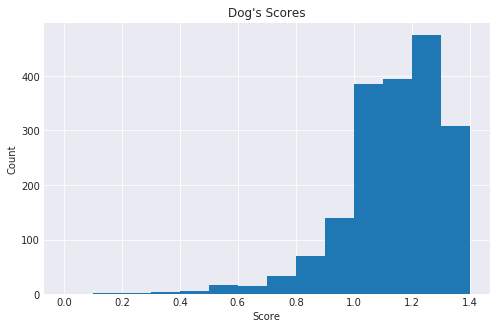

In [63]:
df_clean['scores'].plot('hist',figsize=(8,5),bins=14)
plt.ylabel('Count')
plt.xlabel('Score')
plt.title('Dog\'s Scores');


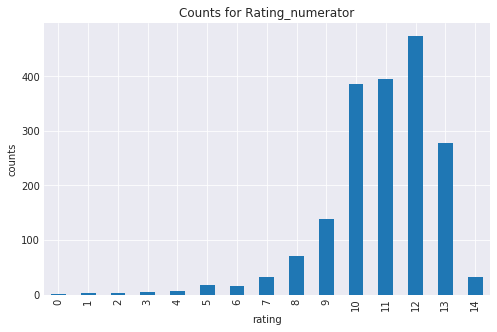

In [64]:
df_clean.rating_numerator.value_counts().sort_index().plot(kind='bar',figsize=(8,5))
plt.xlabel('rating')
plt.ylabel('counts')
plt.title('Counts for Rating_numerator');

The visualization above shows the histogram for the scores of the dogs. The wey this score value is calculated is by dividing the numerator value with the denominator value. As we can see here the histogram are left skewed which also mean that the mean which is 1.01 is less than the median which is 1.1. Besides, this also show that low rating are less likely to be given to rate the dogs. The common scores is between 1.0 to 1.3 while 12/10 being the most common rating given which is the highest peak in the histogram above or known as the mode.

##### 2. Does tweet with high favorite_count is more likely to be retweeted? are they related to each other?

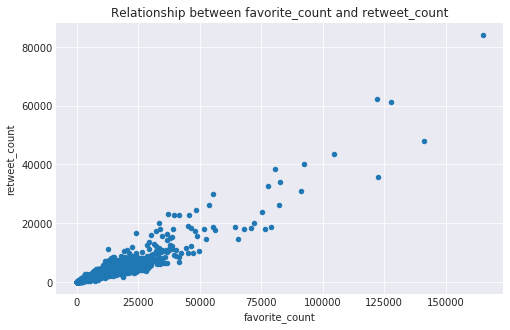

In [65]:
df_clean.plot(x='favorite_count',y='retweet_count',kind='scatter',figsize=(8,5))
plt.title('Relationship between favorite_count and retweet_count');

In [66]:
df_clean.favorite_count.describe()

count    1855.000000  
mean     8928.125067  
std      13069.304225 
min      51.000000    
25%      2013.000000  
50%      4086.000000  
75%      11002.000000 
max      164943.000000
Name: favorite_count, dtype: float64

In [67]:
df_clean.favorite_count.max()
df_clean.query('favorite_count == 164943')

,tweet_id,retweet_count,favorite_count,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,scores
1025,744234799360020481,84083,164943,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13,10,Unknown,doggo,1.3


From the above scatter plot we can see the strong positive correlation between the favorite count and the retweet count. Tweets that have high favorite counts are most likely to have high retweet count as well.

There is only one of the tweet that surpass 150000 favourites count and having the highest retweet count of more than 80000. It is a funny video of a doggo standing inside a pool when he realized that his feet touches the bottom of the pool. See picture below.

<img src="image.png" alt="Drawing" style="width: 400px;"/>


##### 3.  Is there any relationship between rating and favorite?

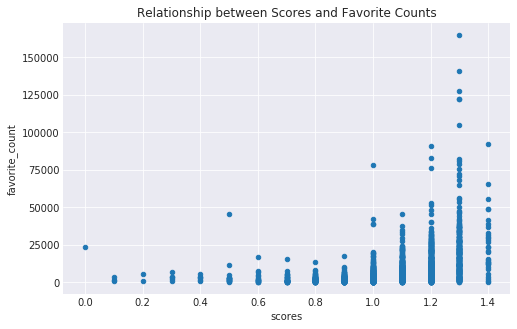

In [68]:
df_clean.query('favorite_count > 0').plot(x='scores',y='favorite_count',kind='scatter',figsize=(8,5))
plt.title('Relationship between Scores and Favorite Counts');

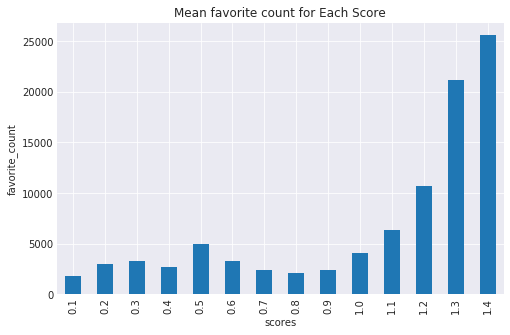

In [69]:
rating_fav=df_clean.query('scores > 0').groupby('scores').favorite_count.mean()
rating_fav.plot(kind='bar',figsize=(8,5))
plt.ylabel('favorite_count')
plt.title('Mean favorite count for Each Score');


The scatter plot shows that there is no correlation between the scores and the favorite counts. However from the bar chart above, it is obvious that dogs with higher scores get higher favorite counts for scores 1 and above. Meanwhile for the score below than 1, there is no trend in their the favorite counts.

##### 4. What is the most famous names for dogs?

In [70]:
df_clean.query('name != "Unknown"').name.value_counts()


Lucy           11
Cooper         10
Oliver         9 
Tucker         9 
Charlie        9 
Penny          8 
Daisy          7 
Lola           7 
Winston        7 
Sadie          7 
Jax            6 
Koda           6 
Oscar          6 
Toby           6 
Rusty          5 
Stanley        5 
Bo             5 
Bailey         5 
Bella          5 
Leo            5 
Bentley        5 
Reggie         4 
Louis          4 
Maggie         4 
Winnie         4 
Jack           4 
Scout          4 
Finn           4 
Duke           4 
Gus            4 
              .. 
Bell           1 
Sierra         1 
Sansa          1 
Albus          1 
Rodney         1 
Fizz           1 
Rizzo          1 
Ralpher        1 
Spanky         1 
Strudel        1 
Poppy          1 
Herb           1 
Bauer          1 
Fiji           1 
Bobbay         1 
Superpup       1 
Betty          1 
Stella         1 
Frönq          1 
Perry          1 
Eleanor        1 
Alf            1 
Shakespeare    1 
Oreo           1 
Chaz      

Lucy ranked first as the famous names for dogs and Cooper ranked second.

##### 5. Does younger dog's typically get higher rating than older dog?

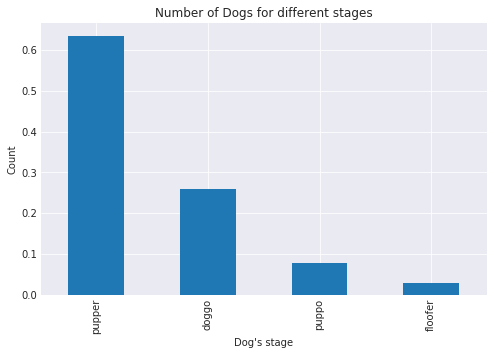

In [71]:
dogstage_prop=df_clean.dog_stage.value_counts()/df_clean.dog_stage.count()
dogstage_prop.plot('bar',figsize=(8,5))
plt.ylabel('Count')
plt.xlabel('Dog\'s stage')
plt.title('Number of Dogs for different stages');

In [72]:
sample=df_clean.groupby('dog_stage').scores.mean()
sample

dog_stage
doggo      1.180519
floofer    1.188889
pupper     1.095767
puppo      1.200000
Name: scores, dtype: float64

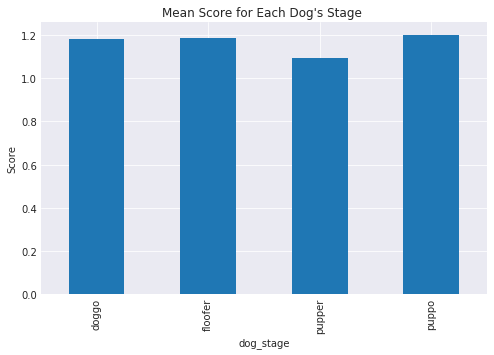

In [73]:
sample.plot(kind='bar',figsize=(8,5))
plt.ylabel('Score')
plt.title('Mean Score for Each Dog\'s Stage ');

Bar chart above show the proportions of the dogs for their stages which could be either doggo, puppo, pupper or floofer. This proportion are calculated based on the data with their dog_stage are known. Which means, dogs with unknown stage are not considered in this calculation.  

From the chart above,more than half of dog pictures posted by the twitter users to be rated by WeRateDogs are pupper followed by doggo,puppo and floofer.

However, based on the mean scores for each of the stages, their scores do not differ much except for pupper, which gets one unit of rating less than the other. All three for duggo,puppo and floofer received mean rating of 12/10 while pupper got 11/10.

This concluded that neither younger dog nor floofer dog tends to get higher rating and the dog's stage and scores doesn't correlate to each other.